<a href="https://colab.research.google.com/github/TatianaDaza/uni/blob/main/Modelo_Matematico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import sympy as sp

In [3]:
class CoupledMassesSystem:
    def __init__(self, m1, m2, k, F0):
        """
        Inicializa el sistema de dos masas acopladas

        Parameters:
        m1, m2: masas (kg)
        k: constante del resorte (N/m)
        F0: magnitud del impulso (N·s)
        """
        self.m1 = m1
        self.m2 = m2
        self.k = k
        self.F0 = F0

        # Cálculo de frecuencias naturales
        self.omega1 = 0  # Modo de cuerpo rígido
        self.omega2 = np.sqrt(k * (1/m1 + 1/m2))  # Frecuencia natural

        print(f"Parámetros del sistema:")
        print(f"m1 = {m1} kg, m2 = {m2} kg")
        print(f"k = {k} N/m, F0 = {F0} N·s")
        print(f"Frecuencia natural ω2 = {self.omega2:.3f} rad/s")
        print(f"Período natural T = {2*np.pi/self.omega2:.3f} s")

    def analytical_solution(self, t):
        """
        Solución analítica usando transformada de Laplace inversa
        """
        m1, m2, k, F0 = self.m1, self.m2, self.k, self.F0
        omega2 = self.omega2

        # Solución para x1(t)
        A1 = F0 / (m1 + m2)  # Componente constante
        B1 = F0 * m2 / (m1 * (m1 + m2) * omega2**2)  # Amplitud oscilante

        x1 = A1 * t + B1 * (1 - np.cos(omega2 * t))

        # Solución para x2(t)
        A2 = F0 / (m1 + m2)  # Componente constante
        B2 = -F0 / (m1 * omega2**2)  # Amplitud oscilante

        x2 = A2 * t + B2 * (1 - np.cos(omega2 * t))

        return x1, x2

    def velocities(self, t):
        """Cálculo de velocidades"""
        m1, m2, k, F0 = self.m1, self.m2, self.k, self.F0
        omega2 = self.omega2

        # Velocidades
        A1 = F0 / (m1 + m2)
        B1 = F0 * m2 / (m1 * (m1 + m2) * omega2)

        v1 = A1 + B1 * np.sin(omega2 * t)

        A2 = F0 / (m1 + m2)
        B2 = -F0 / (m1 * omega2)

        v2 = A2 + B2 * np.sin(omega2 * t)

        return v1, v2

    def accelerations(self, t):
        """Cálculo de aceleraciones"""
        m1, m2, k, F0 = self.m1, self.m2, self.k, self.F0
        omega2 = self.omega2

        # Aceleraciones
        B1 = F0 * m2 * omega2 / (m1 * (m1 + m2))
        a1 = B1 * np.cos(omega2 * t)

        B2 = -F0 * omega2 / m1
        a2 = B2 * np.cos(omega2 * t)

        return a1, a2

    def simulate_and_plot(self, t_max=10, dt=0.01):
        """
        Simula el sistema y genera gráficas
        """
        t = np.arange(0, t_max, dt)

        # Calcular respuestas
        x1, x2 = self.analytical_solution(t)
        v1, v2 = self.velocities(t)
        a1, a2 = self.accelerations(t)

        # Crear figura con subplots
        fig, axes = plt.subplots(3, 1, figsize=(12, 10))
        fig.suptitle('Sistema de Dos Masas Acopladas - Respuesta a Impulso', fontsize=16)

        # Gráfica de desplazamientos
        axes[0].plot(t, x1, 'b-', linewidth=2, label='x₁(t) - Masa 1')
        axes[0].plot(t, x2, 'r-', linewidth=2, label='x₂(t) - Masa 2')
        axes[0].set_ylabel('Desplazamiento (m)')
        axes[0].set_title('Desplazamientos vs Tiempo')
        axes[0].grid(True, alpha=0.3)
        axes[0].legend()

        # Gráfica de velocidades
        axes[1].plot(t, v1, 'b-', linewidth=2, label='v₁(t) - Masa 1')
        axes[1].plot(t, v2, 'r-', linewidth=2, label='v₂(t) - Masa 2')
        axes[1].set_ylabel('Velocidad (m/s)')
        axes[1].set_title('Velocidades vs Tiempo')
        axes[1].grid(True, alpha=0.3)
        axes[1].legend()

        # Gráfica de aceleraciones
        axes[2].plot(t, a1, 'b-', linewidth=2, label='a₁(t) - Masa 1')
        axes[2].plot(t, a2, 'r-', linewidth=2, label='a₂(t) - Masa 2')
        axes[2].set_xlabel('Tiempo (s)')
        axes[2].set_ylabel('Aceleración (m/s²)')
        axes[2].set_title('Aceleraciones vs Tiempo')
        axes[2].grid(True, alpha=0.3)
        axes[2].legend()

        plt.tight_layout()
        plt.show()

        return t, x1, x2, v1, v2, a1, a2

    def energy_analysis(self, t_max=10, dt=0.01):
        """
        Análisis de energía del sistema
        """
        t = np.arange(0, t_max, dt)
        x1, x2 = self.analytical_solution(t)
        v1, v2 = self.velocities(t)

        # Energías
        KE1 = 0.5 * self.m1 * v1**2  # Energía cinética masa 1
        KE2 = 0.5 * self.m2 * v2**2  # Energía cinética masa 2
        PE = 0.5 * self.k * (x1 - x2)**2  # Energía potencial del resorte

        Total_Energy = KE1 + KE2 + PE

        plt.figure(figsize=(12, 8))

        plt.subplot(2, 1, 1)
        plt.plot(t, KE1, 'b-', label='Energía Cinética m₁')
        plt.plot(t, KE2, 'r-', label='Energía Cinética m₂')
        plt.plot(t, PE, 'g-', label='Energía Potencial')
        plt.plot(t, Total_Energy, 'k--', linewidth=2, label='Energía Total')
        plt.ylabel('Energía (J)')
        plt.title('Análisis de Energía del Sistema')
        plt.legend()
        plt.grid(True, alpha=0.3)

        plt.subplot(2, 1, 2)
        plt.plot(t, x1 - x2, 'purple', linewidth=2, label='Deformación del resorte')
        plt.xlabel('Time (s)')
        plt.ylabel('Deformación (m)')
        plt.title('Deformación del Resorte vs Tiempo')
        plt.legend()
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        print(f"Energía inicial (impulso): {self.F0**2/(2*(self.m1 + self.m2)):.6f} J")
        print(f"Energía final promedio: {np.mean(Total_Energy[-100:]):.6f} J")

    def frequency_response(self):
        """
        Análisis de la respuesta en frecuencia
        """
        # Crear función de transferencia para cada masa
        # H1(s) = X1(s)/F(s) y H2(s) = X2(s)/F(s)

        # Coeficientes del denominador común
        a = self.m1 * self.m2
        b = self.k * (self.m1 + self.m2)

        # Función de transferencia para masa 1
        num1 = [self.m2, 0, self.k]  # m2*s^2 + k
        den1 = [a, 0, b, 0, 0]       # m1*m2*s^4 + k*(m1+m2)*s^2

        # Función de transferencia para masa 2
        num2 = [0, 0, self.k]        # k
        den2 = [a, 0, b, 0, 0]       # m1*m2*s^4 + k*(m1+m2)*s^2

        # Crear sistemas de función de transferencia
        sys1 = signal.TransferFunction(num1, den1)
        sys2 = signal.TransferFunction(num2, den2)

        # Respuesta en frecuencia
        w = np.logspace(-2, 2, 1000)  # Frecuencias de 0.01 a 100 rad/s
        w1, h1 = signal.freqresp(sys1, w)
        w2, h2 = signal.freqresp(sys2, w)

        plt.figure(figsize=(12, 8))

        plt.subplot(2, 1, 1)
        plt.loglog(w1, np.abs(h1), 'b-', linewidth=2, label='|H₁(jω)| - Masa 1')
        plt.loglog(w2, np.abs(h2), 'r-', linewidth=2, label='|H₂(jω)| - Masa 2')
        plt.axvline(self.omega2, color='k', linestyle='--', alpha=0.7, label=f'ω₂ = {self.omega2:.2f} rad/s')
        plt.ylabel('Magnitud')
        plt.title('Respuesta en Frecuencia - Magnitud')
        plt.legend()
        plt.grid(True, alpha=0.3)

        plt.subplot(2, 1, 2)
        plt.semilogx(w1, np.angle(h1, deg=True), 'b-', linewidth=2, label='∠H₁(jω) - Masa 1')
        plt.semilogx(w2, np.angle(h2, deg=True), 'r-', linewidth=2, label='∠H₂(jω) - Masa 2')
        plt.axvline(self.omega2, color='k', linestyle='--', alpha=0.7, label=f'ω₂ = {self.omega2:.2f} rad/s')
        plt.xlabel('Frecuencia (rad/s)')
        plt.ylabel('Fase (grados)')
        plt.title('Respuesta en Frecuencia - Fase')
        plt.legend()
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()


Parámetros del sistema:
m1 = 2.0 kg, m2 = 1.0 kg
k = 100.0 N/m, F0 = 10.0 N·s
Frecuencia natural ω2 = 12.247 rad/s
Período natural T = 0.513 s

=== SIMULACIÓN DEL SISTEMA ===


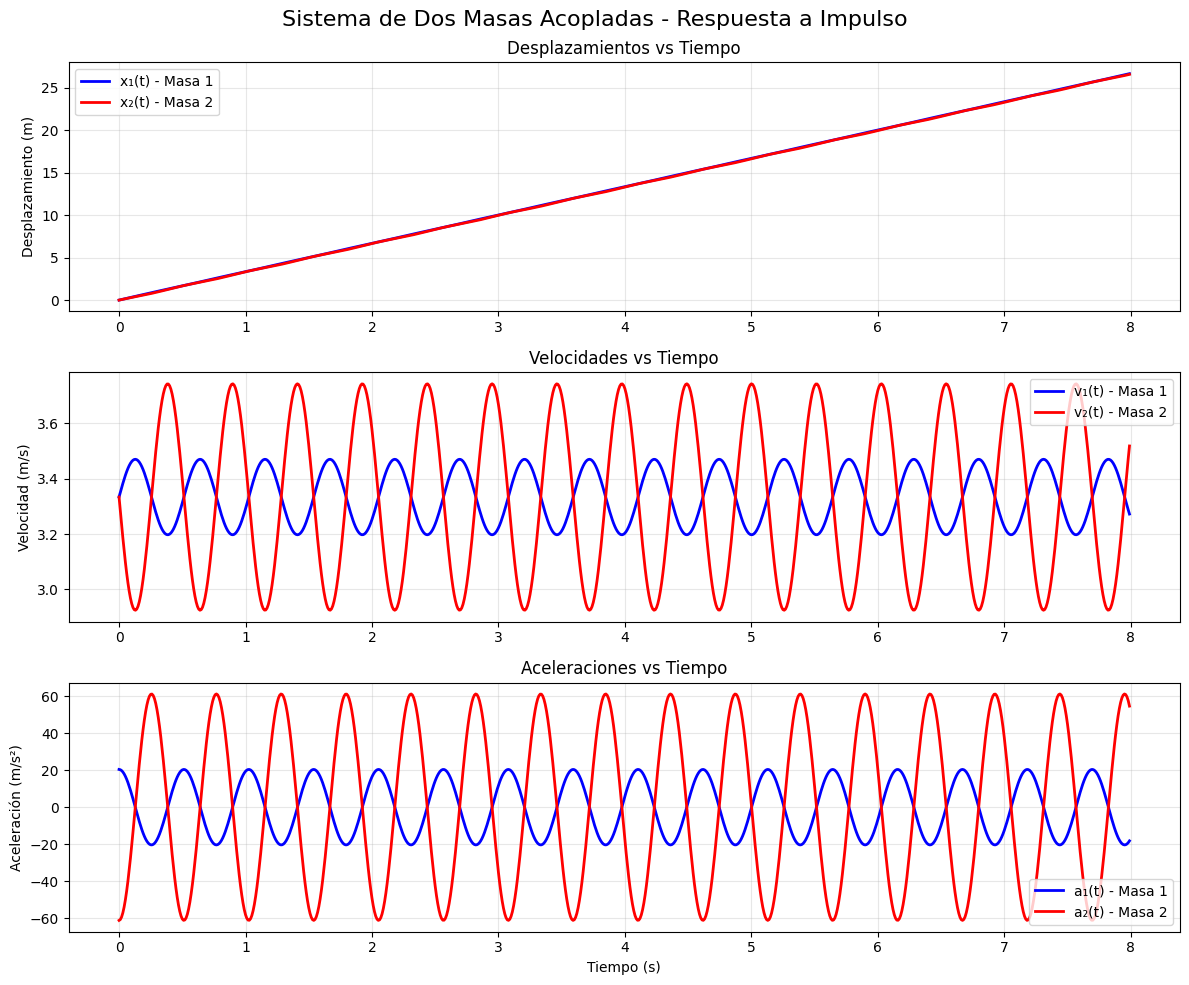


=== ANÁLISIS DE ENERGÍA ===


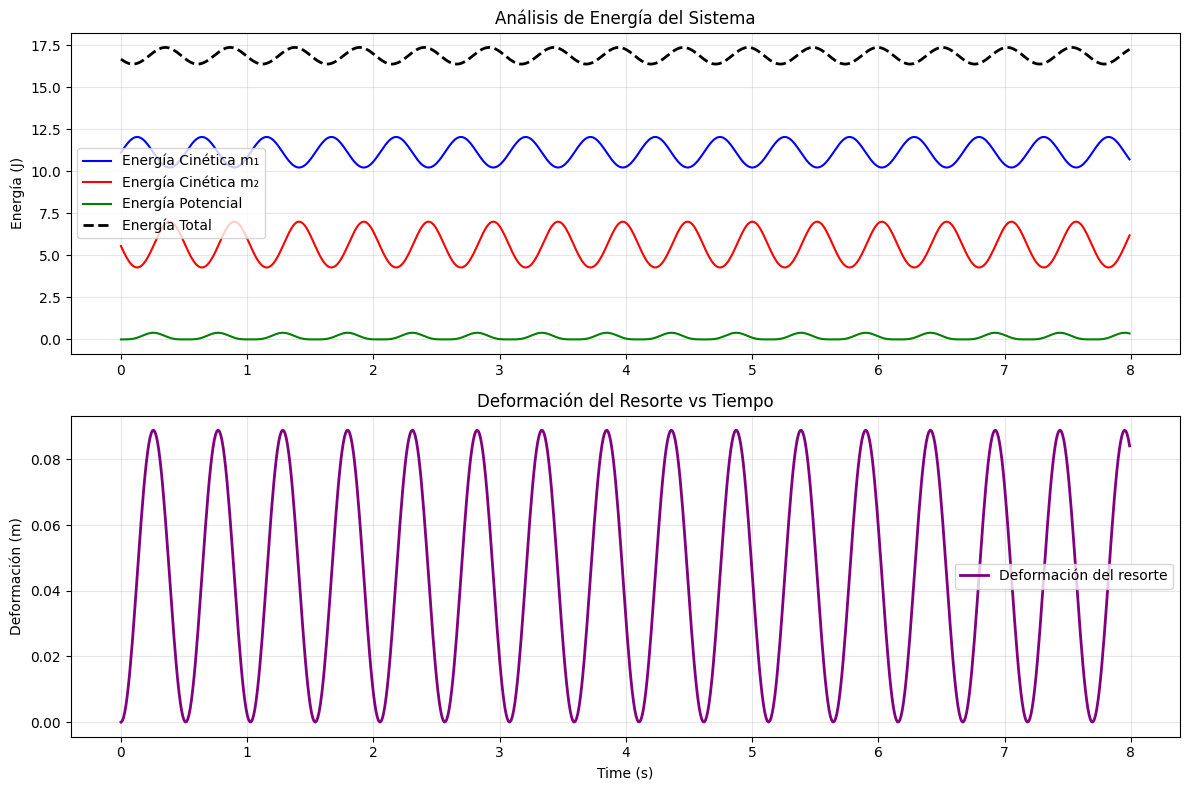

Energía inicial (impulso): 16.666667 J
Energía final promedio: 16.854313 J

=== ANÁLISIS DE FRECUENCIA ===


/usr/local/lib/python3.11/dist-packages/scipy/signal/_ltisys.py:599: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  self.num, self.den = normalize(*system)


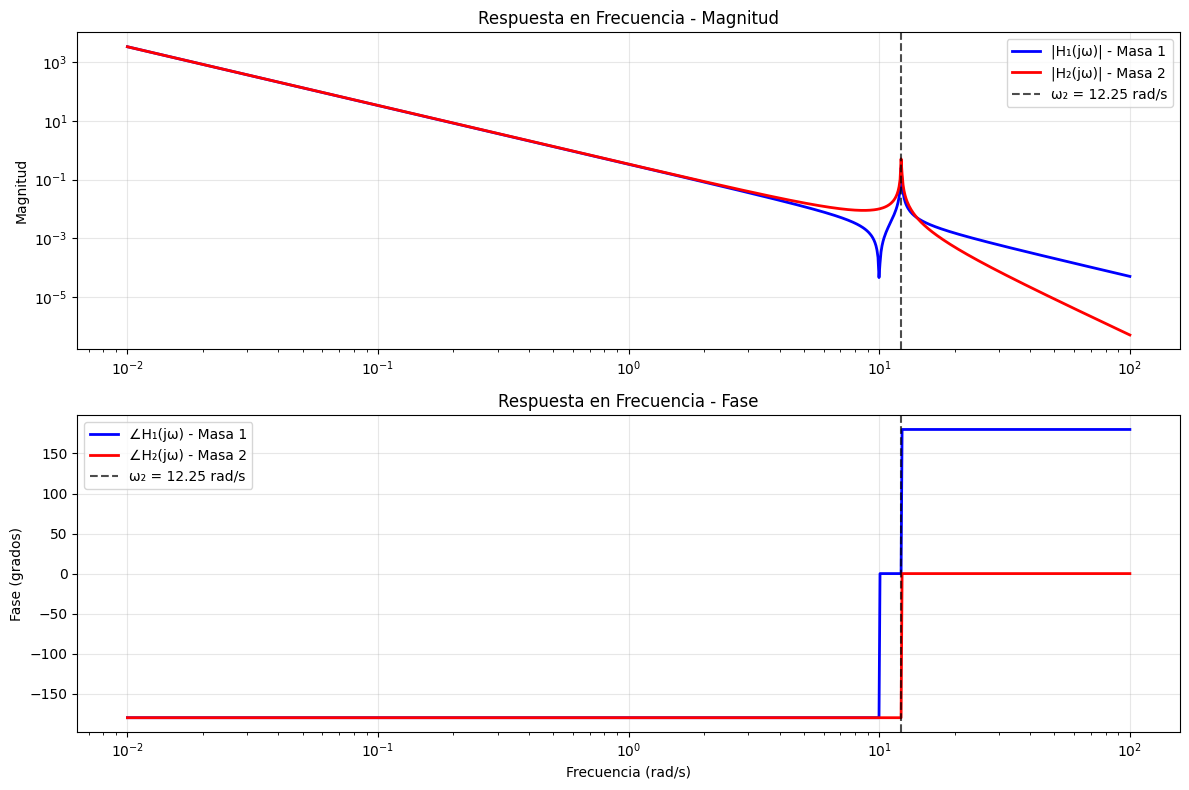


=== VALORES CARACTERÍSTICOS ===
Desplazamiento máximo masa 1: 26.6544 m
Desplazamiento máximo masa 2: 26.5702 m
Velocidad máxima masa 1: 3.4694 m/s
Velocidad máxima masa 2: 3.7416 m/s
Diferencia máxima de posición: 0.0889 m


In [4]:
# Ejemplo de uso
if __name__ == "__main__":
    # Parámetros del sistema
    m1 = 2.0    # kg
    m2 = 1.0    # kg
    k = 100.0   # N/m
    F0 = 10.0   # N·s (impulso)

    # Crear sistema
    system = CoupledMassesSystem(m1, m2, k, F0)

    # Simular y graficar
    print("\n=== SIMULACIÓN DEL SISTEMA ===")
    t, x1, x2, v1, v2, a1, a2 = system.simulate_and_plot(t_max=8, dt=0.01)

    # Análisis de energía
    print("\n=== ANÁLISIS DE ENERGÍA ===")
    system.energy_analysis(t_max=8, dt=0.01)

    # Respuesta en frecuencia
    print("\n=== ANÁLISIS DE FRECUENCIA ===")
    system.frequency_response()

    # Mostrar algunos valores característicos
    print(f"\n=== VALORES CARACTERÍSTICOS ===")
    print(f"Desplazamiento máximo masa 1: {np.max(np.abs(x1)):.4f} m")
    print(f"Desplazamiento máximo masa 2: {np.max(np.abs(x2)):.4f} m")
    print(f"Velocidad máxima masa 1: {np.max(np.abs(v1)):.4f} m/s")
    print(f"Velocidad máxima masa 2: {np.max(np.abs(v2)):.4f} m/s")
    print(f"Diferencia máxima de posición: {np.max(np.abs(x1-x2)):.4f} m")